In [159]:
from sklearn import datasets
from sklearn.preprocessing import scale
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from statistics import mean
from sklearn.decomposition import PCA

# Génération des données

In [75]:
USArrests = pd.read_csv("USArrests.csv", sep = ",",index_col=0)
USArrests

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
list_name = ("Alabama", "Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming")

In [4]:
d = pd.DataFrame(scale(USArrests), index=list_name)
d.columns = ["Murder", "Assault", "UrbanPop", "Rape"]
d

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901
Connecticut,-1.040880,-0.736484,0.799761,-1.092723
Delaware,-0.437875,0.815030,0.450825,-0.585834
Florida,1.765415,1.990786,1.009122,1.150530
Georgia,2.229265,0.487757,-0.386621,0.492653


# Distance ward : 

In [5]:
Z = linkage(d,method='ward')

# Dendogramme

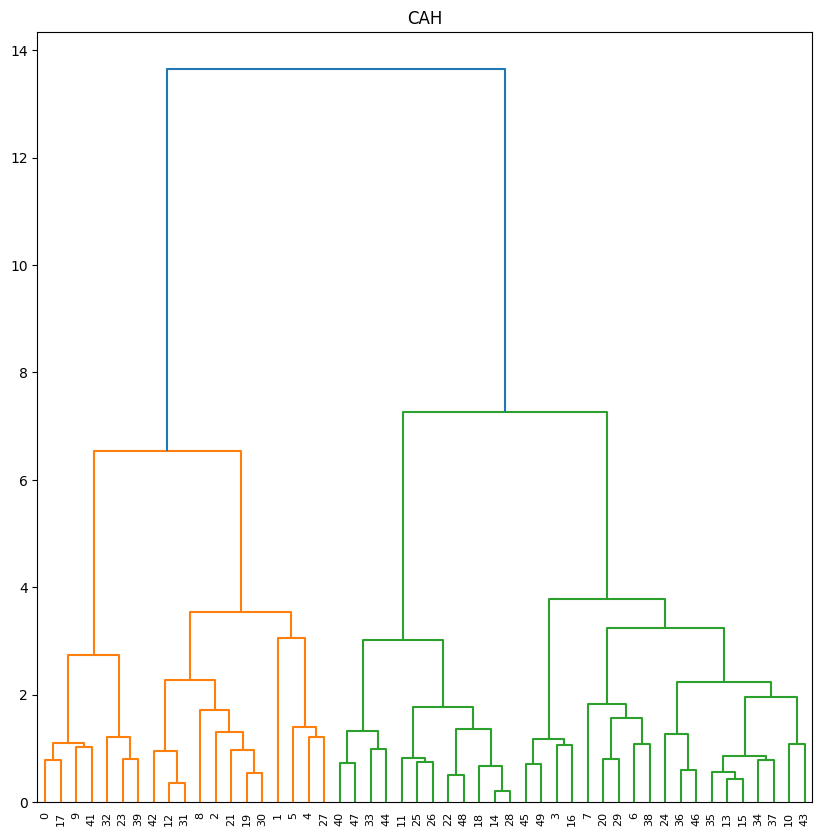

In [21]:
plt.figure(figsize=(10,10))
plt.title('CAH')
df = dendrogram(Z)
plt.show()

On ne peut pas faire le graph des hautes, mais par vision du dendogramme, on remarque que l'on peut faire 2 ou 4 classes. 

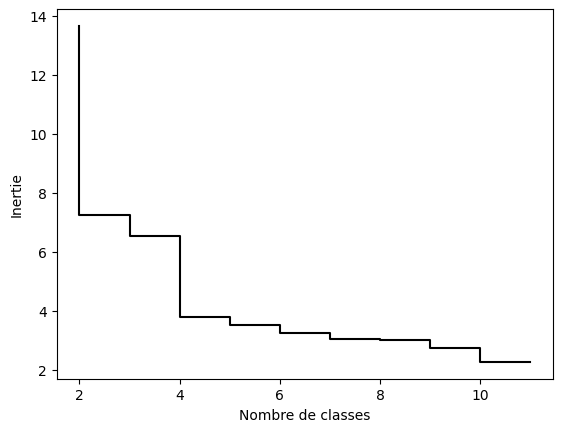

In [29]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)
plt.step(idxs, last_rev, c="black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")
plt.show()

De plus, grâce à l'inertie on constate que pour la classe 3 l'inertie est moins importante que la classe 2 et 4. Celles-ci confirment la conclusion que l'on a eu à l'aide du dendogramme.

# Avec 2 classes

In [52]:
cutree = hierarchy.cut_tree(Z, n_clusters=2)
d["cutree"] = cutree
d

,Murder,Assault,UrbanPop,Rape,cutree
Alabama,1.255179,0.790787,-0.526195,-0.003451,0
Alaska,0.513019,1.118060,-1.224067,2.509424,0
Arizona,0.072361,1.493817,1.009122,1.053466,0
Arkansas,0.234708,0.233212,-1.084492,-0.186794,1
California,0.281093,1.275635,1.776781,2.088814,0
Colorado,0.025976,0.402909,0.869548,1.883901,0
Connecticut,-1.040880,-0.736484,0.799761,-1.092723,1
Delaware,-0.437875,0.815030,0.450825,-0.585834,1
Florida,1.765415,1.990786,1.009122,1.150530,0
Georgia,2.229265,0.487757,-0.386621,0.492653,0


## Classe 1

In [59]:
class0 = d[d["cutree"] == 0]

Cardinal : 

In [78]:
n0 = len(class0)
n0

19

Centre de gravité : 

In [77]:
cg0 = class0.mean(axis=0)
cg0

Murder      1.053771
Assault     1.073403
UrbanPop    0.193714
Rape        0.861041
cutree      0.000000
dtype: float64

In [108]:
Inertie0 = np.mean(np.apply_along_axis(func1d=lambda x: np.sum((class0-cg0)**2),axis=1,arr=class0))
Inertie0

9.237473932257407

## Classe 2

In [60]:
class1 = d[d["cutree"] == 1]

Cardinal : 

In [103]:
n1 = len(class1)
n1

31

Centre de gravité : 

In [102]:
cg1 = class1.mean(axis=0)
cg1

Murder     -0.645859
Assault    -0.657892
UrbanPop   -0.118728
Rape       -0.527735
cutree      1.000000
dtype: float64

In [107]:
Inertie1 = np.mean(np.apply_along_axis(func1d=lambda x: np.sum((class1-cg1)**2),axis=1,arr=class1))
Inertie1

12.120811038896374

La classe 2 est donc la plus dispersée.

On remarque : 
- Pour la classe 1 (0 ici) : les états ont un fort taux de crime et un taux d'urbanisation élevé (excepté l'Alaska : il y a une urbanisation faible mais un taux de viole/criminalité très fort)
- Pour la classe 2 : les états ont un faible taux de crime et de taux d'urbanisation 

# ACP

In [166]:
pca_usarrest = PCA()
pca_usarrest = pca_usarrest.fit(d)
#pca_usarrest = pca_usarrest.fit_transform(d)

In [134]:
0.62704141 + 0.23717902

0.86422043

On prend donc les 2 premières composantes car elles représentent 86% des données.

In [171]:
from bioinfokit.visuz import cluster

# get PC scores
pca_scores = PCA().fit_transform(d)
loadings = pca_usarrest.components_

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=d.columns.values, var1=round(pca_usarrest.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_usarrest.explained_variance_ratio_[1]*100,2))